# Objective:

Given a Bank’s customer information, can we build a classifier which can
determine whether they will leave or not?

# Context:

Businesses like banks which provide service have to worry about problem
of 'Churn' i.e. customers leaving and joining another service provider. It is
important to understand which aspects of the service influence a
customer's decision in this regard. Management can concentrate efforts
on improvement of service, keeping in mind these priorities.

Steps and Milestones (100%):
Setup Environment and Load Necessary Packages (5%)
Data Preparation (40%)
  o Loading Data (5%)
  o Cleaning Data (10%)
  o Data Representation & Feature Engineering (If Any) (15%)
  o Creating Train and Validation Set (10%)
Model Creation (30%)
  o Write & Configure Model (10%)
  o Compile Model (10%)
  o Build Model & Checking Summary (10%)
Training and Evaluation (25%)
  o Run Multiple Experiments (10%)
  o Reason & Visualize Model Performance (5%)
  o Evaluate Model on Test Set (10%)

# Setup Environment and Load Necessary Packages (5%)

In [18]:
import pandas as pd
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow import keras
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization  
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


# Data Preparation (40%)<br>
o Loading Data (5%)<br>
o Cleaning Data (10%)<br>
o Data Representation & Feature Engineering (If Any) (15%)<br>
o Creating Train and Validation Set (10%)

In [3]:
df=pd.read_csv('bank.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# RowNumber, CustomerId, Surname are not important, so we will drop these columns 
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
df['Geography'] = df['Geography'].astype('category')
df['Gender'] = df['Gender'].astype('category')

In [7]:
df = pd.get_dummies(df, columns=['Geography','Gender'])

In [8]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [9]:
X = df.drop('Exited',axis=1).values
y = df['Exited'].values

In [10]:
df['Exited'].value_counts() # This is imbalnced dataset 

0    7963
1    2037
Name: Exited, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
Xs_train = sc.transform(X_train)
Xs_test = sc.transform(X_test)

In [13]:
# convert from integers to floats
Xs_train = Xs_train.astype('float32')
Xs_test = Xs_test.astype('float32')

In [14]:
Xs_train.shape,Xs_test.shape,y_train.shape,y_test.shape

((8000, 13), (2000, 13), (8000,), (2000,))

In [15]:
np.unique(y_train,return_counts=True) #For training, 0 and 1 are almost equally distributed

(array([0, 1], dtype=int64), array([6378, 1622], dtype=int64))

In [16]:
np.unique(y_test,return_counts=True)

(array([0, 1], dtype=int64), array([1585,  415], dtype=int64))

In [20]:
sm=SMOTE()
Xs_train, y_train = sm.fit_sample(Xs_train, y_train)

In [28]:
np.unique(y_train,return_counts=True)

(array([0, 1], dtype=int64), array([6378, 6378], dtype=int64))

In [21]:
Xs_train.shape,Xs_test.shape

((12756, 13), (2000, 13))

In [22]:
ytrain = keras.utils.to_categorical(y_train, 2)
ytest = keras.utils.to_categorical(y_test, 2)

In [23]:
Xs_train

array([[-0.23082039, -0.9444998 , -0.70174205, ..., -0.5727314 ,
        -0.9150907 ,  0.9150907 ],
       [-0.25150913, -0.9444998 , -0.35520276, ..., -0.5727314 ,
         1.0927879 , -1.0927879 ],
       [-0.3963303 ,  0.77498704,  0.33787578, ..., -0.5727314 ,
         1.0927879 , -1.0927879 ],
       ...,
       [-1.9575125 ,  0.2805743 , -0.04923887, ...,  1.7460192 ,
         1.0927879 , -1.0927879 ],
       [ 0.9062327 , -0.63070077, -0.15708892, ..., -0.5727314 ,
        -0.9150907 ,  0.9150907 ],
       [-1.0718747 , -0.36742648,  1.3774936 , ..., -0.5727314 ,
        -0.9150907 ,  0.9150907 ]], dtype=float32)

# Model Creation (30%)<br>
  o Write & Configure Model (10%)<br>
  o Compile Model (10%)<br>
  o Build Model & Checking Summary (10%)<br>

In [90]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.constraints import max_norm
import tensorflow as tf

# Initialize the constructor
model = Sequential()

# Define model architecture

wt_init=tf.keras.initializers.he_normal(seed=None)

model.add(Flatten(input_shape = (Xs_train.shape[1], )))
model.add(Dense(256, activation = 'relu',kernel_initializer = wt_init,kernel_constraint = max_norm(2)))
model.add(BatchNormalization())
model.add(Dropout(rate=0.2)) 
model.add(Dense(128, activation ='relu',kernel_initializer = wt_init,kernel_constraint = max_norm(2)))
model.add(Dropout(rate=0.1))
model.add(Dense(64, activation ='relu',kernel_initializer = wt_init,kernel_constraint = max_norm(2)))
model.add(Dropout(rate=0.1))
model.add(Dense(64, activation ='relu',kernel_initializer = wt_init,kernel_constraint = max_norm(2)))
model.add(Dropout(rate=0.1))
model.add(Dense(64, activation ='relu',kernel_initializer = wt_init,kernel_constraint = max_norm(2)))
model.add(Dropout(rate=0.1))
model.add(Dense(2,activation='softmax'))

In [91]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001,decay=1e-6)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [92]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 13)                0         
_________________________________________________________________
dense_64 (Dense)             (None, 256)               3584      
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_53 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_54 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 64)              

In [93]:
epochs = 800
batch_size = 12756

history = model.fit(Xs_train, ytrain, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=1)
loss,accuracy  = model.evaluate(Xs_test, ytest, verbose=False)

Train on 11480 samples, validate on 1276 samples
Epoch 1/800
11480/11480 [==============================] - 3s 273us/sample - loss: 2.1713 - accuracy: 0.4449 - val_loss: 0.3725 - val_accuracy: 0.8558
Epoch 2/800
11480/11480 [==============================] - 0s 29us/sample - loss: 1.5288 - accuracy: 0.4439 - val_loss: 0.7216 - val_accuracy: 0.5823
Epoch 3/800
11480/11480 [==============================] - 0s 28us/sample - loss: 1.0995 - accuracy: 0.4748 - val_loss: 1.1344 - val_accuracy: 0.2727
Epoch 4/800
11480/11480 [==============================] - 0s 30us/sample - loss: 0.9199 - accuracy: 0.5139 - val_loss: 1.4627 - val_accuracy: 0.1042
Epoch 5/800
11480/11480 [==============================] - 0s 30us/sample - loss: 0.8755 - accuracy: 0.5582 - val_loss: 1.6163 - val_accuracy: 0.0549
Epoch 6/800
11480/11480 [==============================] - 0s 30us/sample - loss: 0.8844 - accuracy: 0.5788 - val_loss: 1.6072 - val_accuracy: 0.0470
Epoch 7/800
11480/11480 [=========================

Epoch 55/800
11480/11480 [==============================] - 0s 31us/sample - loss: 0.5012 - accuracy: 0.7568 - val_loss: 0.5049 - val_accuracy: 0.7265
Epoch 56/800
11480/11480 [==============================] - 0s 30us/sample - loss: 0.4977 - accuracy: 0.7590 - val_loss: 0.5054 - val_accuracy: 0.7249
Epoch 57/800
11480/11480 [==============================] - 0s 33us/sample - loss: 0.4954 - accuracy: 0.7579 - val_loss: 0.5051 - val_accuracy: 0.7249
Epoch 58/800
11480/11480 [==============================] - 0s 31us/sample - loss: 0.4994 - accuracy: 0.7600 - val_loss: 0.5041 - val_accuracy: 0.7241
Epoch 59/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.4942 - accuracy: 0.7598 - val_loss: 0.5026 - val_accuracy: 0.7241
Epoch 60/800
11480/11480 [==============================] - 0s 30us/sample - loss: 0.4959 - accuracy: 0.7641 - val_loss: 0.5008 - val_accuracy: 0.7226
Epoch 61/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.4928 - ac

Epoch 110/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.4510 - accuracy: 0.7867 - val_loss: 0.4589 - val_accuracy: 0.7500
Epoch 111/800
11480/11480 [==============================] - 0s 30us/sample - loss: 0.4513 - accuracy: 0.7881 - val_loss: 0.4583 - val_accuracy: 0.7524
Epoch 112/800
11480/11480 [==============================] - 0s 33us/sample - loss: 0.4562 - accuracy: 0.7874 - val_loss: 0.4585 - val_accuracy: 0.7524
Epoch 113/800
11480/11480 [==============================] - 0s 28us/sample - loss: 0.4517 - accuracy: 0.7914 - val_loss: 0.4588 - val_accuracy: 0.7516
Epoch 114/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.4528 - accuracy: 0.7867 - val_loss: 0.4594 - val_accuracy: 0.7500
Epoch 115/800
11480/11480 [==============================] - 0s 27us/sample - loss: 0.4512 - accuracy: 0.7889 - val_loss: 0.4598 - val_accuracy: 0.7500
Epoch 116/800
11480/11480 [==============================] - 0s 30us/sample - loss: 0.44

Epoch 164/800
11480/11480 [==============================] - 0s 33us/sample - loss: 0.4268 - accuracy: 0.8011 - val_loss: 0.4275 - val_accuracy: 0.7766
Epoch 165/800
11480/11480 [==============================] - 0s 28us/sample - loss: 0.4259 - accuracy: 0.8018 - val_loss: 0.4264 - val_accuracy: 0.7766
Epoch 166/800
11480/11480 [==============================] - 0s 30us/sample - loss: 0.4317 - accuracy: 0.8026 - val_loss: 0.4248 - val_accuracy: 0.7774
Epoch 167/800
11480/11480 [==============================] - 0s 30us/sample - loss: 0.4246 - accuracy: 0.8029 - val_loss: 0.4236 - val_accuracy: 0.7782
Epoch 168/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.4248 - accuracy: 0.8010 - val_loss: 0.4221 - val_accuracy: 0.7821
Epoch 169/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.4243 - accuracy: 0.8024 - val_loss: 0.4212 - val_accuracy: 0.7837
Epoch 170/800
11480/11480 [==============================] - 0s 30us/sample - loss: 0.42

Epoch 218/800
11480/11480 [==============================] - 0s 30us/sample - loss: 0.4076 - accuracy: 0.8106 - val_loss: 0.3934 - val_accuracy: 0.8111
Epoch 219/800
11480/11480 [==============================] - 0s 28us/sample - loss: 0.4018 - accuracy: 0.8169 - val_loss: 0.3929 - val_accuracy: 0.8119
Epoch 220/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.4090 - accuracy: 0.8108 - val_loss: 0.3926 - val_accuracy: 0.8103
Epoch 221/800
11480/11480 [==============================] - 0s 28us/sample - loss: 0.4089 - accuracy: 0.8132 - val_loss: 0.3917 - val_accuracy: 0.8096
Epoch 222/800
11480/11480 [==============================] - 0s 28us/sample - loss: 0.4097 - accuracy: 0.8115 - val_loss: 0.3903 - val_accuracy: 0.8135
Epoch 223/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.4093 - accuracy: 0.8144 - val_loss: 0.3888 - val_accuracy: 0.8135
Epoch 224/800
11480/11480 [==============================] - 0s 30us/sample - loss: 0.40

Epoch 272/800
11480/11480 [==============================] - 0s 28us/sample - loss: 0.3926 - accuracy: 0.8173 - val_loss: 0.3634 - val_accuracy: 0.8425
Epoch 273/800
11480/11480 [==============================] - 0s 28us/sample - loss: 0.3934 - accuracy: 0.8207 - val_loss: 0.3620 - val_accuracy: 0.8440
Epoch 274/800
11480/11480 [==============================] - 0s 28us/sample - loss: 0.3900 - accuracy: 0.8206 - val_loss: 0.3602 - val_accuracy: 0.8472
Epoch 275/800
11480/11480 [==============================] - 0s 28us/sample - loss: 0.3918 - accuracy: 0.8198 - val_loss: 0.3582 - val_accuracy: 0.8480
Epoch 276/800
11480/11480 [==============================] - 0s 30us/sample - loss: 0.3863 - accuracy: 0.8220 - val_loss: 0.3563 - val_accuracy: 0.8487
Epoch 277/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.3872 - accuracy: 0.8238 - val_loss: 0.3551 - val_accuracy: 0.8487
Epoch 278/800
11480/11480 [==============================] - 0s 30us/sample - loss: 0.38

Epoch 326/800
11480/11480 [==============================] - 0s 30us/sample - loss: 0.3738 - accuracy: 0.8293 - val_loss: 0.3305 - val_accuracy: 0.8676
Epoch 327/800
11480/11480 [==============================] - 0s 28us/sample - loss: 0.3762 - accuracy: 0.8267 - val_loss: 0.3307 - val_accuracy: 0.8668
Epoch 328/800
11480/11480 [==============================] - 0s 30us/sample - loss: 0.3690 - accuracy: 0.8348 - val_loss: 0.3304 - val_accuracy: 0.8676
Epoch 329/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.3749 - accuracy: 0.8301 - val_loss: 0.3303 - val_accuracy: 0.8668
Epoch 330/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.3693 - accuracy: 0.8352 - val_loss: 0.3306 - val_accuracy: 0.8668
Epoch 331/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.3687 - accuracy: 0.8310 - val_loss: 0.3303 - val_accuracy: 0.8660
Epoch 332/800
11480/11480 [==============================] - 0s 32us/sample - loss: 0.37

Epoch 380/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.3544 - accuracy: 0.8388 - val_loss: 0.3044 - val_accuracy: 0.8777
Epoch 381/800
11480/11480 [==============================] - 0s 31us/sample - loss: 0.3551 - accuracy: 0.8428 - val_loss: 0.3058 - val_accuracy: 0.8777
Epoch 382/800
11480/11480 [==============================] - 0s 28us/sample - loss: 0.3614 - accuracy: 0.8349 - val_loss: 0.3063 - val_accuracy: 0.8770
Epoch 383/800
11480/11480 [==============================] - 0s 30us/sample - loss: 0.3519 - accuracy: 0.8428 - val_loss: 0.3068 - val_accuracy: 0.8754
Epoch 384/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.3571 - accuracy: 0.8411 - val_loss: 0.3064 - val_accuracy: 0.8754
Epoch 385/800
11480/11480 [==============================] - 0s 28us/sample - loss: 0.3603 - accuracy: 0.8362 - val_loss: 0.3053 - val_accuracy: 0.8762
Epoch 386/800
11480/11480 [==============================] - 0s 30us/sample - loss: 0.35

Epoch 434/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.3369 - accuracy: 0.8453 - val_loss: 0.2776 - val_accuracy: 0.8934
Epoch 435/800
11480/11480 [==============================] - 0s 30us/sample - loss: 0.3420 - accuracy: 0.8453 - val_loss: 0.2780 - val_accuracy: 0.8942
Epoch 436/800
11480/11480 [==============================] - 0s 28us/sample - loss: 0.3380 - accuracy: 0.8477 - val_loss: 0.2785 - val_accuracy: 0.8942
Epoch 437/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.3368 - accuracy: 0.8470 - val_loss: 0.2784 - val_accuracy: 0.8926
Epoch 438/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.3376 - accuracy: 0.8483 - val_loss: 0.2782 - val_accuracy: 0.8918
Epoch 439/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.3411 - accuracy: 0.8471 - val_loss: 0.2785 - val_accuracy: 0.8918
Epoch 440/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.33

Epoch 488/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.3246 - accuracy: 0.8577 - val_loss: 0.2578 - val_accuracy: 0.9020
Epoch 489/800
11480/11480 [==============================] - 0s 30us/sample - loss: 0.3267 - accuracy: 0.8506 - val_loss: 0.2558 - val_accuracy: 0.9044
Epoch 490/800
11480/11480 [==============================] - 0s 28us/sample - loss: 0.3260 - accuracy: 0.8525 - val_loss: 0.2538 - val_accuracy: 0.9060
Epoch 491/800
11480/11480 [==============================] - 0s 30us/sample - loss: 0.3223 - accuracy: 0.8573 - val_loss: 0.2531 - val_accuracy: 0.9060
Epoch 492/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.3273 - accuracy: 0.8528 - val_loss: 0.2534 - val_accuracy: 0.9052
Epoch 493/800
11480/11480 [==============================] - 0s 28us/sample - loss: 0.3268 - accuracy: 0.8555 - val_loss: 0.2536 - val_accuracy: 0.9052
Epoch 494/800
11480/11480 [==============================] - 0s 28us/sample - loss: 0.32

Epoch 542/800
11480/11480 [==============================] - 0s 30us/sample - loss: 0.3107 - accuracy: 0.8605 - val_loss: 0.2402 - val_accuracy: 0.9154
Epoch 543/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.3079 - accuracy: 0.8629 - val_loss: 0.2379 - val_accuracy: 0.9161
Epoch 544/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.3085 - accuracy: 0.8640 - val_loss: 0.2369 - val_accuracy: 0.9177
Epoch 545/800
11480/11480 [==============================] - 0s 28us/sample - loss: 0.3066 - accuracy: 0.8649 - val_loss: 0.2360 - val_accuracy: 0.9177
Epoch 546/800
11480/11480 [==============================] - 0s 30us/sample - loss: 0.3134 - accuracy: 0.8595 - val_loss: 0.2354 - val_accuracy: 0.9154
Epoch 547/800
11480/11480 [==============================] - 0s 28us/sample - loss: 0.3085 - accuracy: 0.8642 - val_loss: 0.2348 - val_accuracy: 0.9154
Epoch 548/800
11480/11480 [==============================] - 0s 28us/sample - loss: 0.30

Epoch 596/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.3010 - accuracy: 0.8693 - val_loss: 0.2243 - val_accuracy: 0.9271
Epoch 597/800
11480/11480 [==============================] - 0s 28us/sample - loss: 0.2957 - accuracy: 0.8692 - val_loss: 0.2240 - val_accuracy: 0.9287
Epoch 598/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.2957 - accuracy: 0.8698 - val_loss: 0.2230 - val_accuracy: 0.9318
Epoch 599/800
11480/11480 [==============================] - 0s 28us/sample - loss: 0.3018 - accuracy: 0.8693 - val_loss: 0.2210 - val_accuracy: 0.9326
Epoch 600/800
11480/11480 [==============================] - 0s 30us/sample - loss: 0.2926 - accuracy: 0.8712 - val_loss: 0.2192 - val_accuracy: 0.9326
Epoch 601/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.2967 - accuracy: 0.8700 - val_loss: 0.2178 - val_accuracy: 0.9326
Epoch 602/800
11480/11480 [==============================] - 0s 28us/sample - loss: 0.30

Epoch 650/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.2902 - accuracy: 0.8724 - val_loss: 0.2087 - val_accuracy: 0.9342
Epoch 651/800
11480/11480 [==============================] - 0s 28us/sample - loss: 0.2852 - accuracy: 0.8744 - val_loss: 0.2096 - val_accuracy: 0.9334
Epoch 652/800
11480/11480 [==============================] - 0s 28us/sample - loss: 0.2816 - accuracy: 0.8737 - val_loss: 0.2096 - val_accuracy: 0.9334
Epoch 653/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.2885 - accuracy: 0.8716 - val_loss: 0.2098 - val_accuracy: 0.9326
Epoch 654/800
11480/11480 [==============================] - 0s 30us/sample - loss: 0.2841 - accuracy: 0.8772 - val_loss: 0.2100 - val_accuracy: 0.9326
Epoch 655/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.2896 - accuracy: 0.8712 - val_loss: 0.2100 - val_accuracy: 0.9334
Epoch 656/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.27

Epoch 704/800
11480/11480 [==============================] - 0s 30us/sample - loss: 0.2784 - accuracy: 0.8777 - val_loss: 0.1961 - val_accuracy: 0.9428
Epoch 705/800
11480/11480 [==============================] - 0s 30us/sample - loss: 0.2749 - accuracy: 0.8774 - val_loss: 0.1962 - val_accuracy: 0.9436
Epoch 706/800
11480/11480 [==============================] - 0s 28us/sample - loss: 0.2700 - accuracy: 0.8834 - val_loss: 0.1975 - val_accuracy: 0.9459
Epoch 707/800
11480/11480 [==============================] - 0s 28us/sample - loss: 0.2714 - accuracy: 0.8821 - val_loss: 0.1979 - val_accuracy: 0.9467
Epoch 708/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.2751 - accuracy: 0.8827 - val_loss: 0.1972 - val_accuracy: 0.9475
Epoch 709/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.2725 - accuracy: 0.8836 - val_loss: 0.1966 - val_accuracy: 0.9483
Epoch 710/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.27

Epoch 758/800
11480/11480 [==============================] - 0s 30us/sample - loss: 0.2599 - accuracy: 0.8863 - val_loss: 0.1858 - val_accuracy: 0.9491
Epoch 759/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.2693 - accuracy: 0.8831 - val_loss: 0.1853 - val_accuracy: 0.9498
Epoch 760/800
11480/11480 [==============================] - 0s 31us/sample - loss: 0.2652 - accuracy: 0.8845 - val_loss: 0.1852 - val_accuracy: 0.9498
Epoch 761/800
11480/11480 [==============================] - 0s 31us/sample - loss: 0.2646 - accuracy: 0.8861 - val_loss: 0.1861 - val_accuracy: 0.9475
Epoch 762/800
11480/11480 [==============================] - 0s 30us/sample - loss: 0.2616 - accuracy: 0.8846 - val_loss: 0.1864 - val_accuracy: 0.9483
Epoch 763/800
11480/11480 [==============================] - 0s 31us/sample - loss: 0.2607 - accuracy: 0.8881 - val_loss: 0.1853 - val_accuracy: 0.9514
Epoch 764/800
11480/11480 [==============================] - 0s 29us/sample - loss: 0.26

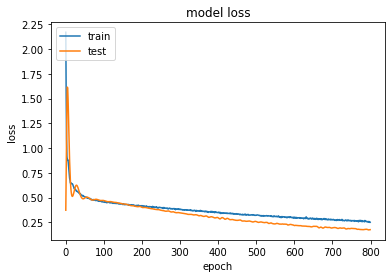

In [94]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

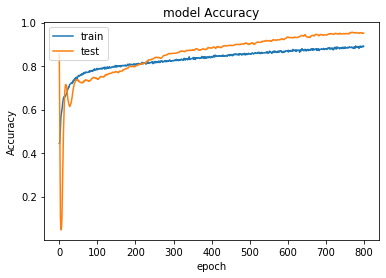

In [95]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

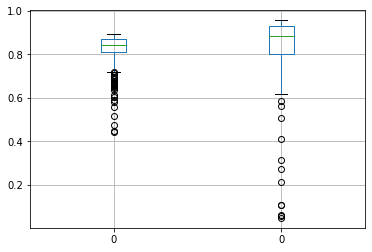

In [96]:
#print(history.history['val_accuracy'])
#print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

In [97]:
predictions = model.predict(Xs_test)

In [100]:
predictions[0]

array([9.9910200e-01, 8.9805364e-04], dtype=float32)

In [101]:
np.argmax(predictions[0])

0

In [102]:
y_test[0]

0

In [98]:
from sklearn import metrics
y_pred = []
for val in predictions:
    y_pred.append(np.argmax(val))
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)
cr=metrics.classification_report(y_test,y_pred)
print(cr)

[[1365  220]
 [ 156  259]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1585
           1       0.54      0.62      0.58       415

    accuracy                           0.81      2000
   macro avg       0.72      0.74      0.73      2000
weighted avg       0.82      0.81      0.82      2000



In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100

81.2